In [1]:
from sklearn.svm import LinearSVC
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.random.rand(128)
y = X * 5. + np.random.rand(128)

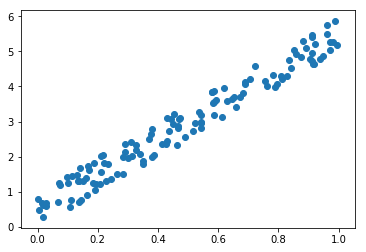

In [3]:
plt.scatter(X, y)

In [4]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_mldata

In [5]:
mnist = fetch_mldata('MNIST original')

In [6]:
X, y = mnist['data'], mnist['target']
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [8]:
from sklearn.model_selection import GridSearchCV
svm_clf = SVC()
param_grid = [
    {'C': [0.5, 1.0, 2.0, 4.0, 8.0, 16.0], 'degree': [3, 4, 5, 6, 7], 'kernel': ['rbf', 'poly']}
]
grid_search = GridSearchCV(svm_clf, param_grid, cv=3, verbose=3, n_iter=1)
grid_search.fit(X_train_scaled[:10000], y_train[:10000])

TypeError: __init__() got an unexpected keyword argument 'n_iter'

In [9]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

In [10]:
X, y = housing['data'], housing['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_prep = scaler.fit_transform(X_train)
X_test_prep = scaler.transform(X_test)

In [12]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
best_params = RandomizedSearchCV(SVR(), {'gamma': reciprocal(0.0001, 0.1), 'C': uniform(1, 10)}, n_iter=10, cv=5, verbose=3, random_state=42)
best_params.fit(X_train_prep, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=4.74540118847, gamma=0.0711447600934 ..........................
[CV]  C=4.74540118847, gamma=0.0711447600934, score=0.7440177920595072, total=   7.0s
[CV] C=4.74540118847, gamma=0.0711447600934 ..........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.6s remaining:    0.0s


[CV]  C=4.74540118847, gamma=0.0711447600934, score=0.7412747306505737, total=   7.0s
[CV] C=4.74540118847, gamma=0.0711447600934 ..........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   19.5s remaining:    0.0s


[CV]  C=4.74540118847, gamma=0.0711447600934, score=0.731695837752095, total=   7.8s
[CV] C=4.74540118847, gamma=0.0711447600934 ..........................
[CV]  C=4.74540118847, gamma=0.0711447600934, score=0.7437444057773579, total=   8.5s
[CV] C=4.74540118847, gamma=0.0711447600934 ..........................
[CV]  C=4.74540118847, gamma=0.0711447600934, score=0.7306145701842015, total=   8.7s
[CV] C=8.31993941811, gamma=0.00625137357452 .........................
[CV]  C=8.31993941811, gamma=0.00625137357452, score=0.6872543318208699, total=   6.7s
[CV] C=8.31993941811, gamma=0.00625137357452 .........................
[CV]  C=8.31993941811, gamma=0.00625137357452, score=0.6631035534858292, total=   7.2s
[CV] C=8.31993941811, gamma=0.00625137357452 .........................
[CV]  C=8.31993941811, gamma=0.00625137357452, score=0.675725045002082, total=   6.9s
[CV] C=8.31993941811, gamma=0.00625137357452 .........................
[CV]  C=8.31993941811, gamma=0.00625137357452, score=0.68

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  7.9min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11cf318d0>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11cf31e48>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=3)

In [13]:
y_test_results = best_params.predict(X_test_prep)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_test_results)
np.sqrt(mse)

0.59752582183276493